=== TRAIN HEAD ===
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500 

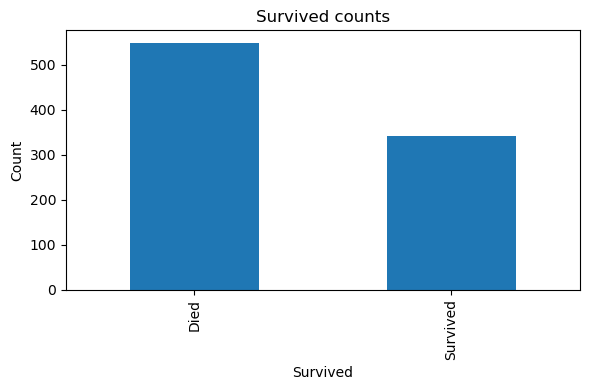

In [10]:
# Project Title : Titanic Survival Prediction using Logistic Regression
# Author        : Shama P S
# Description   : This project builds a Logistic Regression model to predict passenger
#                 survival on the Titanic dataset. It covers data loading, exploratory 
#                 data analysis (EDA), preprocessing (handling missing values, encoding 
#                 categorical features), model training, evaluation, and creation of 
#                 Kaggle submission file.
# Tools Used    : Python, NumPy, Pandas, Matplotlib, scikit-learn
# Dataset Source: Titanic - Machine Learning from Disaster (Kaggle)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# -------------- Load data ----------------
train = pd.read_csv(r"C:\Users\SHAMA P S\Desktop\Shama\train.csv")   # path to train.csv
test = pd.read_csv(r"C:\Users\SHAMA P S\Desktop\Shama\test.csv")

# -------------- Quick EDA ----------------
print("=== TRAIN HEAD ===")
print(train.head())
print("\nInfo:")
print(train.info())
print("\nSurvived value counts:")
print(train['Survived'].value_counts())
print("\nSurvival rate by Sex:")
print(train.groupby('Sex')['Survived'].mean())

# -------------- Preprocessing function ----------------
def preprocess(df, is_train=True, median_age=None, mode_embarked=None):
    out = df.copy()
    # Map Sex
    out['Sex'] = out['Sex'].map({'male': 0, 'female': 1})

    # Fill Age
    if is_train:
        median_age = out['Age'].median()
    out['Age'] = out['Age'].fillna(median_age)

    # Fill Embarked
    if is_train:
        mode_embarked = out['Embarked'].mode()[0]
    out['Embarked'] = out['Embarked'].fillna(mode_embarked)

    # Fill Fare (test set has missing Fare sometimes)
    out['Fare'] = out['Fare'].fillna(out['Fare'].median())

    # Drop unused columns
    drop_cols = ['Name', 'Ticket', 'Cabin']
    for c in drop_cols:
        if c in out.columns:
            out = out.drop(columns=c)

    # One-hot encode Embarked
    out = pd.get_dummies(out, columns=['Embarked'], drop_first=True)

    return out, median_age, mode_embarked

# Preprocess train
train_proc, med_age, mode_emb = preprocess(train, is_train=True)
X = train_proc.drop(['Survived','PassengerId'], axis=1)
y = train_proc['Survived']

print("\nTrain processed columns:", X.columns.tolist())

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_val)
print("\nAccuracy on validation set:", accuracy_score(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# -------------- Prepare test set & create submission ----------------
test_proc, _, _ = preprocess(test, is_train=False, median_age=med_age, mode_embarked=mode_emb)

# Align test columns with train columns
for col in X.columns:
    if col not in test_proc.columns:
        test_proc[col] = 0
test_X = test_proc[X.columns]

# Predict
test_preds = model.predict(test_X)

# Create submission file
submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": test_preds.astype(int)
})
submission.to_csv(r"C:\Users\SHAMA P S\Desktop\Shama\submission.csv", index=False)
print("\n Saved submission.csv inside Shama folder (ready to upload to Kaggle).")

# -------------- Optional: quick plot ----------------
try:
    plt.figure(figsize=(6,4))
    train['Survived'].value_counts().plot(kind='bar')
    plt.title("Survived counts")
    plt.xticks([0,1], ['Died','Survived'])
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("Plotting skipped (headless environment?).", e)